# Signal Decomposition Using EVD of Hankel Matrices

---

Suppose we are given a data signal which consists of several nearly mono-components.

_Can we recover the mono-components?_

The answer is YES, with an efficient algorithm using EVDs of Hankel matrices. 

Mono-component recovery can be successfully applied to audio signals.

## Prerequisites

The reader should be familiar to elementary concepts about signals, and with linear algebra concepts, particularly EVD and its properties and algorithms.
 
## Competences 

The reader should be able to decompose given signal into mono-components using EVD methods.

## References

For more details see [P. Jain and R. B. Pachori, An iterative approach for decomposition of multi-component non-stationary signals based on eigenvalue decomposition of the Hankel matrix][JP15].

__Credits__: The first Julia implementation was derived in [A. M. Bačak, Master's Thesis][AMB15].

[AMB15]: #1 "Ana Marija Bačak, 'Decomposition of Audio Signal using Eigenvalues and Eigenvectors of Hankel Matrix', Master's Thesis, University of Split, FESB, 2015 (in Croatian)."

[JP15]: http://www.sciencedirect.com/science/article/pii/S0016003215002288 "Pooja Jain and Ram Bilas Pachori, 'An iterative approach for decomposition of multi-component non-stationary signals based on eigenvalue decomposition of the Hankel matrix', Journal of the Franklin Institute, 352 (2015) 4017–4044."

## Extraction  of stationary mono-components

### Definitions

Let $x\in\mathbb{R}^{m}$, denote a __signal__ with $N$ samples.

Assume $x$ is composed of $L$ __stationary mono-components__, $x=\sum\limits_{k=1}^L x^{(k)}$, where
$x^{(k)}_i=A_k \cos(2\pi f_k i +\theta_k)$ for $i=1,2,\ldots,m$.
Here $f_k=\displaystyle\frac{F_k}{F}$ is the __normalized frequency__ of $x^{(k)}$,
$F$ is the __sampling frequency__ of $x$ in Hz, $F_k$ is the sampling frequency of $x^{(k)}$, 
$A_k$ is the __amplitude__ of $x^{(k)}$, and $\theta_k$ is the __phase__ of $x^{(k)}$.
We assume that $F_k< F_{k+1}$ for $k=1,2,\ldots,n-1$, and $F>2F_n$.

A __Hankel matrix__ is a (real) square matrix with constant values along the skew-diagonals. More precisely, let $a\in\mathbb{R}^{2n-1}$. An $n\times n$ matrix $H\equiv H(a)$ for which 
$H_{ij}=A_{i+1,j-1}=a_{i+j-1}$ is a Hankel matrix.

### Facts

Let $x$ be a signal with $2n-1$ samples composed of $L$ stationary mono-components.

Let $H$ be an $n\times n$ Hankel matrix corresponding to $x$ and let 
$H=U\Lambda U^T$ be its EVD (Hankel matrix is symmetric) with 
$\lambda_1\leq \lambda_2 \leq \cdots \leq \lambda_n$.

Smilarly, let $H_k$ be the $n\times n$ Hankel matrix corresponding to the $k$-th component 
$x^{(k)}$ and let $H_k=U_k\Lambda_k U_k^T$ be its EVD.

1. $H=\sum\limits_{k=1}^{L} H_k$.

2. $H_k=\lambda_k U_{:,k}U_{:,k}^T + \lambda_{n-k+1} U_{:,n-k+1}U_{:,n-k+1}^T$.

### Example - Signal with three mono-components

In [1]:
using Winston
using SpecialMatrices

In [2]:
# Small Hankel matrix
a=collect(1:11)
Hankel(a)

6x6 SpecialMatrices.Hankel{Int64}:
 1  2  3  4   5   6
 2  3  4  5   6   7
 3  4  5  6   7   8
 4  5  6  7   8   9
 5  6  7  8   9  10
 6  7  8  9  10  11

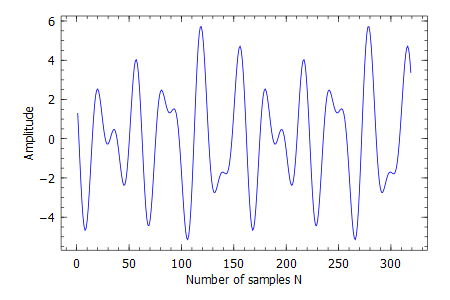

In [3]:
# Create the signal
n=160
N=2*n-1
F = 6400
L = 3
A = [3, 2, 1]
Fk= [200, 320, 160]
θ = [pi/2, pi/4, 0]
x = zeros(N)
for k=1:L
    for i=1:N
        x[i]+=A[k]*cos(2*pi*Fk[k]*i/F+θ[k])
    end
end
plot(x,"b",xlabel="Number of samples N", ylabel="Amplitude")

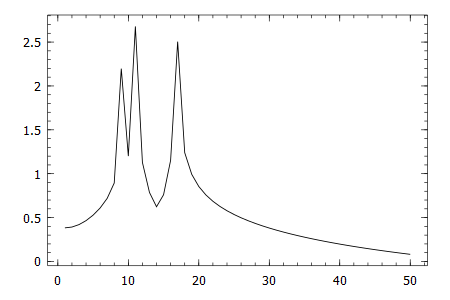

In [4]:
# FFT indicates that there are three components
y=fft(x)
plot(log10(abs(y[1:50])))

In [5]:
# Let us decompose the signal 
H=Hankel(x)

160x160 SpecialMatrices.Hankel{Float64}:
  1.3104     0.115875  -1.08857   …   4.07448    3.35497    2.41421 
  0.115875  -1.08857   -2.22028       3.35497    2.41421    1.3104  
 -1.08857   -2.22028   -3.20152       2.41421    1.3104     0.115875
 -2.22028   -3.20152   -3.96587       1.3104     0.115875  -1.08857 
 -3.20152   -3.96587   -4.46374       0.115875  -1.08857   -2.22028 
 -3.96587   -4.46374   -4.66636   …  -1.08857   -2.22028   -3.20152 
 -4.46374   -4.66636   -4.56793      -2.22028   -3.20152   -3.96587 
 -4.66636   -4.56793   -4.18585      -3.20152   -3.96587   -4.46374 
 -4.56793   -4.18585   -3.55882      -3.96587   -4.46374   -4.66636 
 -4.18585   -3.55882   -2.74321      -4.46374   -4.66636   -4.56793 
 -3.55882   -2.74321   -1.80783   …  -4.66636   -4.56793   -4.18585 
 -2.74321   -1.80783   -0.827855     -4.56793   -4.18585   -3.55882 
 -1.80783   -0.827855   0.121836     -4.18585   -3.55882   -2.74321 
  ⋮                               ⋱                           

In [6]:
λ,U=eig(full(H))
λ

160-element Array{Float64,1}:
 -240.0        
 -160.0        
  -80.0        
   -6.97029e-13
   -3.58698e-14
   -3.29736e-14
   -3.17235e-14
   -3.01981e-14
   -2.67012e-14
   -2.37507e-14
   -2.36347e-14
   -2.30926e-14
   -2.26485e-14
    ⋮          
    1.73195e-14
    2.10256e-14
    2.13307e-14
    2.30926e-14
    2.3144e-14 
    2.46508e-14
    2.52029e-14
    3.01981e-14
    7.87936e-14
   80.0        
  160.0        
  240.0        

We see that the three smallest and the three largest eigenvalues come in pairs and define the three mono-components. 

The ratios of the moduli of the eigenvalues correspond to the ratios of the amplitudes of the mono-components. 

In [8]:
# Form the three matrices
Hcomp=Array(Any,3)
for k=1:L
    Hcomp[k]=λ[k]*U[:,k]*U[:,k]' + λ[end-k+1]*U[:,end-k+1]*U[:,end-k+1]'
end

In [9]:
# Compare the first matrix with the Hankel matrix of the first mono-component
x1 = zeros(N)
l=1
for i=1:N
    x1[i]+=A[l]*cos(2*pi*Fk[l]*i/F+θ[l])
end

In [10]:
H1=Hankel(x1)
eigvals(full(H1)), norm(Hcomp[1]-H1)

([-240.0,-1.84743e-13,-1.81184e-13,-1.68883e-13,-1.63433e-13,-1.58851e-13,-1.37819e-13,-1.33485e-13,-1.17314e-13,-1.14996e-13  …  1.12834e-13,1.1719e-13,1.22807e-13,1.41079e-13,1.56126e-13,1.63645e-13,1.67565e-13,1.76593e-13,1.84252e-13,240.0],1.4031134548113062e-12)

In [11]:
# Now we reconstruct the mono-components from the skew-diagonal elements of Hcomp
xcomp=Array(Array{Float64},L)
z=Array(Float64,N)
for k=1:L
    z[1:2:N]=diag(Hcomp[k])
    z[2:2:N]=diag(Hcomp[k],1)
    xcomp[k]=copy(z)
end

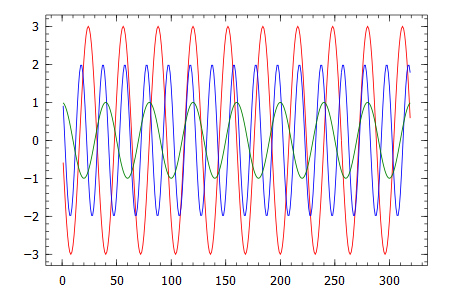

In [12]:
xaxis=collect(1:N)
plot(xaxis,xcomp[1],"r", xaxis,xcomp[2],"b", xaxis,xcomp[3],"g")

## Fast EVD of Hankel matrices

Several outer eigenvalues pairs of Hankel matrices can be computed using Lanczos method. 
If the multiplication $Hx$ is performed using Fast Fourier Transform, this EVD computation is very fast.

### Definitions

A __Toeplitz matrix__ is a (real) square matrix with constant values along the diagonals. 
More precisely, let $a=(a_{-(n-1)},a_{-(n-2)},\ldots,a_{-1},a_0,a_1,\ldots,a_{n-1})\in\mathbb{R}^{2n-1}$. An $n\times n$ matrix $T\equiv T(a)$ for which
$T_{ij}=T_{i+1,j+1}=a_{i-j}$ is a Toeplitz matrix.

A __circulant matrix__ is a Toeplitz matrix where each column is rotated one element downwards relative to preceeding column. More precisely, let $a\in\mathbb{R}^{n}$. An $n\times n$ matrix $C\equiv C(a)=T(a,a_{1:n-1})$ is a Circulant matrix.

A __rotation matrix__ is an identity matrix rotated 90 degrees to the right (or left).

A __Fourier matrix__ is Vandermonde matrix
$F_n=V(1,\omega_n,\omega_n^2,\ldots, \omega_n^{n-1})$, where 
$\omega_n=exp(2\pi i/n)$ is the $n$-th root of unity (see the 
[Eigenvalue Decomposition - Definitions and Facts](../Module B - Eigenvalue and Singular Value Decompositions/L3a Eigenvalue Decomposition - Definitions and Facts.ipynb) notebook).

### Example

Notice different meaning of vector $a$: in `C=Circulant(a)`, $a$ is the first column, in 
`T=Toeplitz(a)`, $a_i$ is the diagonal element of the $i$-th diagonal starting from $T_{1n}$, and in `H=Hankel(a)`, $a_i$ is the element of the $i$-th skew-diagonal starting from $H_{11}$.

In [13]:
C=Circulant([1,2,3,4,5])
TC=Toeplitz([2,3,4,5,1,2,3,4,5])
T=Toeplitz([1,2,3,4,5,6,7,8,9])
H1=Hankel([1,2,3,4,5,6,7,8,9])
J=rotl90(eye(Int64,5))
C,TC,T,H1,J

(
5x5 SpecialMatrices.Circulant{Int64}:
 1  5  4  3  2
 2  1  5  4  3
 3  2  1  5  4
 4  3  2  1  5
 5  4  3  2  1,

5x5 SpecialMatrices.Toeplitz{Int64}:
 1  5  4  3  2
 2  1  5  4  3
 3  2  1  5  4
 4  3  2  1  5
 5  4  3  2  1,

5x5 SpecialMatrices.Toeplitz{Int64}:
 5  4  3  2  1
 6  5  4  3  2
 7  6  5  4  3
 8  7  6  5  4
 9  8  7  6  5,

5x5 SpecialMatrices.Hankel{Int64}:
 1  2  3  4  5
 2  3  4  5  6
 3  4  5  6  7
 4  5  6  7  8
 5  6  7  8  9,

5x5 Array{Int64,2}:
 0  0  0  0  1
 0  0  0  1  0
 0  0  1  0  0
 0  1  0  0  0
 1  0  0  0  0)

### Facts 

For more details see [G. H. Golub and C. F. Van Loan, Matrix Computations, p. 202][GVL96],
and the references therein

[GVL96]: http://web.mit.edu/ehliu/Public/sclark/Golub%20G.H.,%20Van%20Loan%20C.F.-%20Matrix%20Computations.pdf "G. H. Golub and C. F. Van Loan, 'Matrix Computations', 3rd ed., The John Hopkins University Press, Baltimore, MD, 1996."

1. Hankel matrix is the product of a Toeplitz matrix and the rotation matrix.

2. Circulant matrix is normal and, thus, unitarily diagonalizable, with the eigenvalue decomposition
$$
C(a)=U\mathop{\mathrm{diag}}(F_n^* a)U^*,
$$
where $U=\displaystyle\frac{1}{\sqrt{n}} F_n$.
The product $F_n^* a$ can be computed by the _Fast Fourier Transform_(FFT).

3. Given $a,x\in\mathbb{R}^n$, the product $y=C(a)x$ can be computed using FFT as follows:
\begin{align*}
\tilde x&=F_n^*x\\
\tilde a&=F_n^*a\\
\tilde y&=\tilde x.* \tilde a\\
y&= F_n^{-*} \tilde y.
\end{align*}

4. Toeplitz matrix of order $n$ can be embedded in a circulant matrix of order $2n-1$: if
$a\in\mathbb{R}^{2n-1}$, then 
$$
T(a)=[C([a_{n+1:2n-1};a_{1:n}])]_{1:n,1:n}.
$$

5. Further, let $x\in\mathbb{R}^{n}$ and let $\bar x\in\mathbb{R}^{2n-1}$ be equal to $x$ padded with $n-1$ zeros.Then
$$
T(a)x=[C([a_{n+1:2n-1};a_{1:n}])\bar x]_{1:n}.
$$

6. Fact 1 implies $H(a)x=(T(a)J)x=T(a)(Jx)$.


### Examples

In [14]:
# Fact 1
full(T)*J

5x5 Array{Int64,2}:
 1  2  3  4  5
 2  3  4  5  6
 3  4  5  6  7
 4  5  6  7  8
 5  6  7  8  9

In [16]:
# Fact 2
a=rand(-8:8,6)
n=length(a)
C=Circulant(a)
ω=exp(2*pi*im/n)
v=map(Complex,[ω^k for k=0:n-1])
F=Vandermonde(v)
U=F/sqrt(n)
λ=full(F)'*a

6-element Array{Complex{Float64},1}:
           20.0+0.0im    
            6.0-1.73205im
           14.0+8.66025im
 -12.0-3.18079e-14im     
           14.0-8.66025im
            6.0+1.73205im

In [17]:
# Residual
norm(full(C)*U-U*diagm(λ))

4.376043459323008e-14

In [18]:
?fft

search: fft fft! FFTW fftshift rfft ifft bfft ifft! bfft! ifftshift irfft brfft



```
fft(A [, dims])
```

Performs a multidimensional FFT of the array `A`.  The optional `dims` argument specifies an iterable subset of dimensions (e.g. an integer, range, tuple, or array) to transform along.  Most efficient if the size of `A` along the transformed dimensions is a product of small primes; see `nextprod()`.  See also `plan_fft()` for even greater efficiency.

A one-dimensional FFT computes the one-dimensional discrete Fourier transform (DFT) as defined by

$\operatorname{DFT}(A)[k] =
  \sum_{n=1}^{\operatorname{length}(A)}
  \exp\left(-i\frac{2\pi
  (n-1)(k-1)}{\operatorname{length}(A)} \right) A[n].$
A multidimensional FFT simply performs this operation along each transformed dimension of `A`.

Higher performance is usually possible with multi-threading. Use `FFTW.set_num_threads(np)` to use `np` threads, if you have `np` processors.


In [19]:
# Check fft
norm(λ-fft(a))

4.468151149277825e-14

In [20]:
# Fact 3 - Circulant() x vector
import Base.*
function *{T}(C::Circulant{T},x::Vector{T})
    xt=fft(x)
    vt=fft(C.c)
    yt=vt.*xt
    real(ifft(yt))
end

* (generic function with 158 methods)

In [21]:
x=rand(-9:9,n)

6-element Array{Int64,1}:
  8
 -1
  0
 -9
 -9
  2

In [22]:
[full(C)*x C*x]

6x2 Array{Float64,2}:
  -19.0   -19.0
  -17.0   -17.0
   13.0    13.0
  -73.0   -73.0
 -126.0  -126.0
   42.0    42.0

In [23]:
# Fact 4 - Embedding Toeplitz() into Circulant()
n=5
a=rand(-6:6,2*n-1)
T=Toeplitz(a)

5x5 SpecialMatrices.Toeplitz{Int64}:
  5  4  -3  -4   1
  3  5   4  -3  -4
  3  3   5   4  -3
  6  3   3   5   4
 -4  6   3   3   5

In [24]:
C=Circulant([a[n:2*n-1];a[1:n-1]])

9x9 SpecialMatrices.Circulant{Int64}:
  5   4  -3  -4   1  -4   6   3   3
  3   5   4  -3  -4   1  -4   6   3
  3   3   5   4  -3  -4   1  -4   6
  6   3   3   5   4  -3  -4   1  -4
 -4   6   3   3   5   4  -3  -4   1
  1  -4   6   3   3   5   4  -3  -4
 -4   1  -4   6   3   3   5   4  -3
 -3  -4   1  -4   6   3   3   5   4
  4  -3  -4   1  -4   6   3   3   5

In [25]:
# Fact 5 - Toeplitz() x vector
function *{T}(A::Toeplitz{T},x::Vector{T})
    n=length(A.c)
    k=Int(round((n+1)/2))
    C=Circulant([A.c[k:n];A.c[1:k-1]])
    (C*[x;zeros(T,k-1)])[1:k]
end

* (generic function with 159 methods)

In [26]:
x=rand(-6:6,n)

5-element Array{Int64,1}:
  0
 -3
 -2
  3
 -5

In [27]:
[full(T)*x T*x]

5x2 Array{Float64,2}:
 -23.0  -23.0
 -12.0  -12.0
   8.0    8.0
 -20.0  -20.0
 -40.0  -40.0

In [28]:
# Fact 6 - Hankel() x vector
function *{T}(A::Hankel{T},x::Vector{T})
    Toeplitz(A.c)*reverse(x)
end

* (generic function with 160 methods)

In [29]:
H1=Hankel(a)

5x5 SpecialMatrices.Hankel{Int64}:
  1  -4  -3  4   5
 -4  -3   4  5   3
 -3   4   5  3   3
  4   5   3  3   6
  5   3   3  6  -4

In [30]:
[full(H1)*x H1*x]

5x2 Array{Float64,2}:
   5.0    5.0
   1.0    1.0
 -28.0  -28.0
 -42.0  -42.0
  23.0   23.0

### Example - Fast EVD of a Hankel matrix

Given a Hankel matrix $H$, the Lanczos method can be applied by defining a function (linear map) which returns the product $Hx$ for any vector $x$. This approach uses the package [LinearMaps.jl](https://github.com/Jutho/LinearMaps.jl) and is described in the 
[Symmetric Eigenvalue Decomposition - Lanczos Method](../Module B - Eigenvalue and Singular Value Decompositions/L4d Symmetric Eigenvalue Decomposition - Lanczos Method.ipynb) notebook. 

_The computation is very fast and allocates little extra space._

__IMPORTANT__ For package [SpecialMatrices.jl](https://github.com/jiahao/SpecialMatrices.jl)
to work with very large Hankel matrices, we need to modify the corresponding lines in the file `hankel.jl` to 
```
getindex(H::Hankel, i, j) = H.c[i+j-1]
isassigned(H::Hankel, i, j) = isassigned(H.c, i+j-1)
```

In [31]:
using LinearMaps

In [32]:
n=size(H,1)
f(x)=H*x

f (generic function with 1 method)

In [34]:
A=LinearMap(f,n,issym=true)

FunctionMap{Float64}(f,160,160;ismutating=false,issym=true,ishermitian=true,isposdef=false,transpose=nothing,ctranspose=nothing)

In [35]:
size(A)

(160,160)

In [37]:
# Run twice
@time λA,UA=eigs(A, nev=6, which=:LM)

  0.003182 seconds (4.14 k allocations: 1.131 MB)


([239.99999999999991,-239.9999999999999,160.0000000000001,-160.00000000000006,-80.00000000000001,79.99999999999997],
160x6 Array{Float64,2}:
 -0.0709273  -0.0864252  -0.0953281   -0.0584171    0.00877199  -0.111459  
 -0.0527038  -0.0986018  -0.0726105   -0.085016     0.0261      -0.108714  
 -0.0324548  -0.106989   -0.0427853   -0.103293     0.0427853   -0.103293  
 -0.0109586  -0.111265   -0.00877199  -0.111459     0.0584171   -0.0953281 
  0.0109586  -0.111265    0.0261      -0.108714     0.0726105   -0.085016  
  0.0324548  -0.106989    0.0584171   -0.0953281    0.085016    -0.0726105 
  0.0527038  -0.0986018   0.085016    -0.0726105    0.0953281   -0.0584171 
  0.0709273  -0.0864252   0.103293    -0.0427853    0.103293    -0.0427853 
  0.0864252  -0.0709273   0.111459    -0.00877199   0.108714    -0.0261    
  0.0986018  -0.0527038   0.108714     0.0261       0.111459    -0.00877199
  0.106989   -0.0324548   0.0953281    0.0584171    0.111459     0.00877199
  0.111265   -0.0109586

## Extraction of non-stationary mono-components

### Definitions

Let $x\in\mathbb{R}^{m}$, denote a __signal__ with $N$ samples.

Assume $x$ is composed of $L$ __non-stationary mono-components__, $x=\sum\limits_{k=1}^L x^{(k)}$, where
$x^{(k)}_i=A_k \cos(2\pi f_k i +\theta_k)$ for $i=1,2,\ldots,m$.
Assume that the normalized frequencies $f_k=\displaystyle\frac{F_k}{F}$, the sampling frequencies $F_k$, the 
amplitudes  $A_k$, and the phases $\theta_k$, all _sightly_ change in time.

Let $H\equiv H(x)$ be the Hankel matrix of $x$. The eigenpair of $(\lambda,u)$ of $H$ is __significant__
if $|\lambda|> \tau  \cdot \sigma(H)$. Here $\sigma(H)$ is the spectral radius of $H$, and $\tau$ is 
the __significant threshold percentage__ chosen by the user depending on the type of the problem.


### Fact

The following algorithm decomposes the signal $x$:
1. Choose $\tau$ and form the Hankel matrix $H$
2. Compute the EVD of $H$
3. Choose the significant eigenpairs of $H$
4. For each significant eigenpair $(\lambda,u)$
    1. Form the rank one matrix $M=\lambda uu^T$
    2. Define a new signal $y$ consisting of averages of the skew-diagonals of $M$
    3. Form the Hankel matrix $H(y)$
    3. Compute the EVD of $H(y)$
    4. Choose the significant eigenpairs of $H(y)$
    5. __If__ $H(y)$ has only two significant eigenpairs, declare $y$ a mono-component, 
        __else__ go to step 4.

### Example -  Note A

Each tone has its fundamental frequency (mono-component). However, musical instruments produce different overtones (harmonics) which are near integer multiples of the fundamental frequency.
Due to construction of resonant boxes, these frequencies slightly vary in time, and their amplitudes are contained in a time varying envelope.

Tones produces by musical instruments  are nice examples of non-stationary signals. We shall decompose the note A4 played on piano.

For manipulation of recordings, we are using package [WAV.jl](https://github.com/dancasimiro/WAV.jl). Another package with similar functionality is the package [AudioIO.jl](https://github.com/ssfrr/AudioIO.jl).

In [38]:
# Pkg.checkout("WAV")
using WAV

In [39]:
whos(WAV)

                           WAV     84 KB     Module
                      WAVArray    220 bytes  DataType
              WAVE_FORMAT_ALAW      2 bytes  UInt16
        WAVE_FORMAT_IEEE_FLOAT      2 bytes  UInt16
             WAVE_FORMAT_MULAW      2 bytes  UInt16
               WAVE_FORMAT_PCM      2 bytes  UInt16
                     WAVFormat    184 bytes  DataType
            WAVFormatExtension    136 bytes  DataType
               bits_per_sample    575 bytes  Function
                  isextensible    544 bytes  Function
                      isformat   1761 bytes  Function
                     wavappend   2598 bytes  Function
                       wavplay   1015 bytes  Function
                       wavread   4702 bytes  Function
                      wavwrite   8593 bytes  Function


In [40]:
?wavread

search: wavread WAVE_FORMAT_IEEE_FLOAT wavwrite WAVFormatExtension



No documentation found.

`WAV.wavread` is a generic `Function`.

```julia
# 5 methods for generic function "wavread":
wavread(io::IO) at C:\Users\Ivan\.julia\v0.4\WAV\src\WAV.jl:583
wavread(filename::AbstractString) at C:\Users\Ivan\.julia\v0.4\WAV\src\WAV.jl:625
wavread(filename::AbstractString, fmt::AbstractString) at C:\Users\Ivan\.julia\v0.4\WAV\src\WAV.jl:631
wavread(filename::AbstractString, n) at C:\Users\Ivan\.julia\v0.4\WAV\src\WAV.jl:632
wavread(filename::AbstractString, n, fmt) at C:\Users\Ivan\.julia\v0.4\WAV\src\WAV.jl:633
```


In [41]:
# Load a signal
s, Fs = wavread("files/piano_A41.wav")

(
219712x1 Array{Float64,2}:
 -0.0101321 
 -0.0102542 
 -0.0102542 
 -0.0101321 
 -0.00994903
 -0.00964385
 -0.00933866
 -0.00909452
 -0.00878933
 -0.00860622
 -0.00842311
 -0.00799585
 -0.00720237
  ⋮         
  0.0       
  0.0       
  0.0       
  0.0       
 -6.1037e-5 
 -6.1037e-5 
 -6.1037e-5 
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       ,

44100.0f0,0x0010,Dict{Symbol,Any}(:fmt=>WAV.WAVFormat(0x0001,0x0001,0x0000ac44,0x00015888,0x0002,0x0010,WAV.WAVFormatExtension(0x0000,0x00000000,UInt8[]))))

In [42]:
# Play the signal
wavplay(s,Fs)

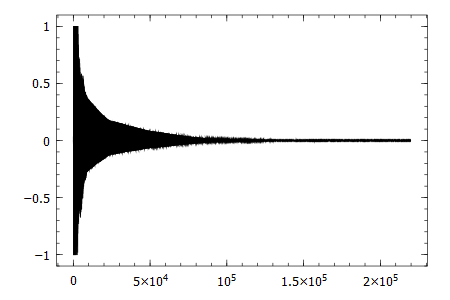

In [43]:
# Plot the signal
plot(s)

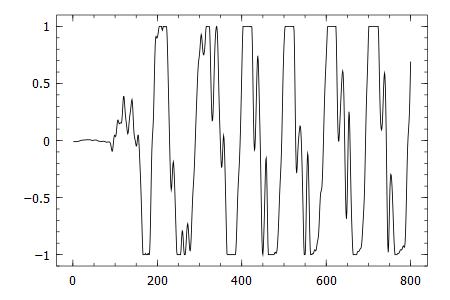

In [44]:
plot(s[1:800])

Let us visualize the signal in detail using the approach from the 
[Julia is Fast](../Module A - Short Julia Course/L01b Julia is Fast.ipynb) notebook. 

In [45]:
using Interact

Interact.Slider{Int64}(Signal{Int64}(109001, nactions=0),"k",109001,1:1000:219001,true)

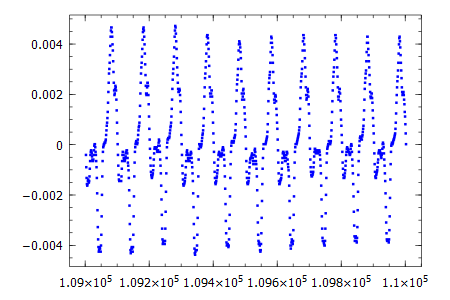

In [46]:
@manipulate for k=1:1000:size(s,1)
    plot(collect(k:k+1000),s[k:k+1000],"b.")
end

In [47]:
# Last part of the signal is just noise, so we read a shorter signal. N must be odd.
signal = wavread("files/piano_A41.wav",100001)

(
100001x1 Array{Float64,2}:
 -0.0101321  
 -0.0102542  
 -0.0102542  
 -0.0101321  
 -0.00994903 
 -0.00964385 
 -0.00933866 
 -0.00909452 
 -0.00878933 
 -0.00860622 
 -0.00842311 
 -0.00799585 
 -0.00720237 
  ⋮          
  0.00335704 
  0.00317392 
  0.00286874 
  0.00231941 
  0.00152593 
  0.000549333
 -0.000427259
 -0.00134281 
 -0.0021363  
 -0.00262459 
 -0.00286874 
 -0.00305185 ,

44100.0f0,0x0010,Dict{Symbol,Any}(:fmt=>WAV.WAVFormat(0x0001,0x0001,0x0000ac44,0x00015888,0x0002,0x0010,WAV.WAVFormatExtension(0x0000,0x00000000,UInt8[]))))

In [48]:
typeof(signal)

Tuple{Array{Float64,2},Float32,UInt16,Dict{Symbol,Any}}

In [49]:
s=signal[1]

100001x1 Array{Float64,2}:
 -0.0101321  
 -0.0102542  
 -0.0102542  
 -0.0101321  
 -0.00994903 
 -0.00964385 
 -0.00933866 
 -0.00909452 
 -0.00878933 
 -0.00860622 
 -0.00842311 
 -0.00799585 
 -0.00720237 
  ⋮          
  0.00335704 
  0.00317392 
  0.00286874 
  0.00231941 
  0.00152593 
  0.000549333
 -0.000427259
 -0.00134281 
 -0.0021363  
 -0.00262459 
 -0.00286874 
 -0.00305185 

In [64]:
wavplay(s,Fs)

In [50]:
wavwrite(signal[1],"files/piano_A41_short.wav",Fs=signal[2])

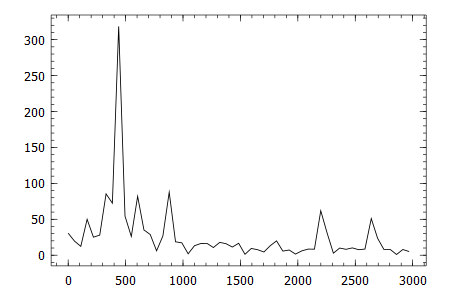

In [51]:
# Check the signal with FFT
Fd=110
N=convert(Int32,ceil(Fs/Fd)) 
xx=collect(0:Fs/(2N):3000)
nn=length(xx)
plot(xx,abs(fft(s[1:800]))[1:nn])

In [52]:
# Form the Hankel matrix
# IMPORTANT - Do not try to display H - it is a 50001 x 50001 matrix.
x=vec(s)
H=Hankel(x);

In [53]:
size(H), H[100,200]

((50001,50001),0.727927488021485)

In [54]:
@time fft(x);

  0.025261 seconds (66 allocations: 3.055 MB)


In [55]:
# We are looking for 20 eigenvalue pairs
n=size(H,1)
f(x)=H*x
A=LinearMap(f,n,issym=true)
size(A)

(50001,50001)

In [57]:
@time λ,U=eigs(A, nev=40, which=:LM)

  6.615922 seconds (28.41 k allocations: 1.698 GB, 5.42% gc time)


([1802.91,-1799.5,1297.45,-1296.27,-537.888,537.759,416.906,-415.32,410.179,-410.158  …  -94.8969,94.8306,92.442,-92.3572,81.7541,-81.7477,65.9095,-65.4746,65.3807,-64.407],
50001x40 Array{Float64,2}:
 -0.0147284    0.00759017    0.0125584    …  -0.000934865  -0.0328479  
 -0.0151816    0.00665314    0.0135616        0.00407886   -0.0344853  
 -0.0155747    0.00568943    0.014351         0.0088179    -0.0358005  
 -0.0159061    0.00470276    0.014914         0.0130764    -0.0366518  
 -0.0161744    0.00369697    0.0152413        0.0166468    -0.0369278  
 -0.0163783    0.00267602    0.0153278    …   0.0193304    -0.0365613  
 -0.0165171    0.00164396    0.0151718        0.020949     -0.0355414  
 -0.0165903    0.000604893   0.0147759        0.0213583    -0.0339241  
 -0.0165975   -0.000437052   0.0141463        0.0204607    -0.0318377  
 -0.0165389   -0.00147771    0.013293         0.0182185    -0.0294777  
 -0.0164148   -0.00251295    0.0122293    …   0.0146626    -0.0270884  
 -0.016

In [58]:
# Count the eigenvalue pairs (+-) larger than the 10% of the maximum
τ=0.1
L=round(Int,(sum(abs(λ).>(τ*maxabs(λ)))/2))

11

At this point, the implementation using full matrices is rather obvious. However, we cannot do that, due to large dimension. Recall, the task is to define Hankel matrices $H_k$ for $k=1,\ldots,L$, from the signal obtained by 
averaging the skew-diagonals of the matrices    
$$
H_k=\lambda_k U_{:,k}U_{:,k}^T + \lambda_{n-k+1} U_{:,n-k+1}U_{:,n-k+1}^T,
$$
_without actually forming the matrices_.

This is a nice programming excercise which can be solved using $\cdot$ products.

In [59]:
function myaverages{T}(λ::T, u::Vector{T})
    n=length(u)
    x=Array(Float64,2*n-1)
    # Average lower diagonals
    for i=1:n
        x[i]=dot(u[1:i],reverse(u[1:i]))/i
    end
    for i=2:n
        x[n+i-1]=dot(u[i:n],reverse(u[i:n]))/(n-i+1)
    end
    λ*x
end

myaverages (generic function with 1 method)

In [60]:
# A small test
u=[1,2,3,4,5]
u*u'

5x5 Array{Int64,2}:
 1   2   3   4   5
 2   4   6   8  10
 3   6   9  12  15
 4   8  12  16  20
 5  10  15  20  25

In [61]:
myaverages(1,u)

9-element Array{Float64,1}:
  1.0    
  2.0    
  3.33333
  5.0    
  7.0    
 11.0    
 15.3333 
 20.0    
 25.0    

We now execute the first step of the algorithm from the above Fact.

Notice that `eigs()` returns the eigenvalues arranged by the absoulte value, so the consecutive 
pairs define the $i$-th signal. The computation of averages is long - it requires $O(n^2)$ 
operations and takes several minutes.

In [62]:
xcomp=Array(Array{Float64},L)
for k=1:L
    xcomp[k]=myaverages(λ[2*k-1],U[:,2*k-1])+myaverages(λ[2*k],U[:,2*k])
end

Let us look and listen to what we got:

Interact.Slider{Int64}(Signal{Int64}(6, nactions=0),"k",6,1:11,true)

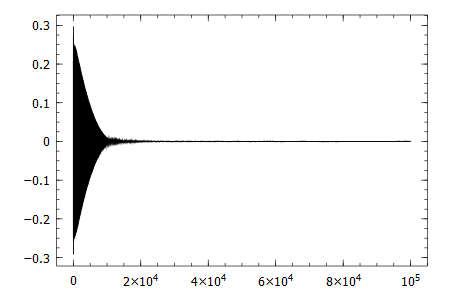

In [63]:
# Entire components
@manipulate for k=1:L
    plot(xcomp[k])
end

Interact.Slider{Int64}(Signal{Int64}(6, nactions=0),"k",6,1:11,true)

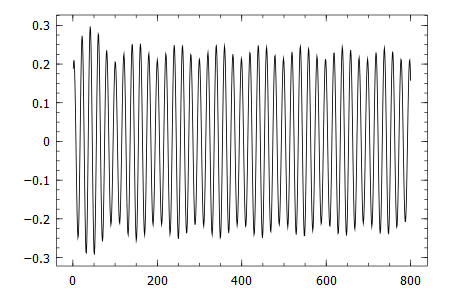

In [64]:
# Short parts of components
@manipulate for k=1:L
    plot(xcomp[k][1:800])
end

Interact.Slider{Int64}(Signal{Int64}(6, nactions=0),"k",6,1:11,true)

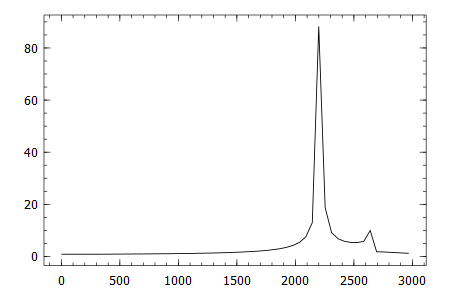

In [65]:
# FFTs of short parts
Fd=110
N=convert(Int32,ceil(Fs/Fd)) 
xx=collect(0:Fs/(2N):3000)
nn=length(xx)
@manipulate for k=1:L
    plot(xx,abs(fft(xcomp[k][1:800]))[1:nn])
end

We see that all `xcomp[k]` are clean mono-components - see 
[Physics of Music - Notes](http://www.phy.mtu.edu/~suits/notefreqs.html):

```
1 = 440 Hz (A4)
2 = 880 Hz (2*440,+octave,A5)
3 = 1320 Hz (3*440,+quint,E6)
4 = 440 Hz  
5 = 880 Hz
6 = 2200 Hz (5*440,++major terza, C#7) 
7 = 2640 Hz (6*440,++quint,E7)
8 = 440 Hz
9 = 2200 Hz
10 = 1760 Hz (4*440,++octave,A6)
11 = 2640 Hz
```

__N.B.__ Some mono-components are repeated, and they should be grouped by adding components with absolute weighted 
correlation larger than some prescribed threshold. 

In [66]:
# Listen to components - wait between k's
# @manipulate for k in slider(1:L, value=1)
wavplay(xcomp[1],Fs)
# end

In [67]:
wavplay(sum([xcomp[i] for i=1:11]),Fs)

In [68]:
# On Windows, store the mono-components
for i=1:11
    wavwrite(xcomp[i],"files/comp$i.wav",Fs=signal[2])
end

__Can we do without averaging?__

The function `myaverages()` is very slow - 7 minutes, compared to 5 seconds for the eigenvalue computation.

The simplest option is to disregard the averages, and use the first column and the last row of the underlying matrix, as in definition of Hankel matrices. Smarter approach might be to use small random samples 
to compute the averages. 

Let us try the simple approach for the fundamental frequency.

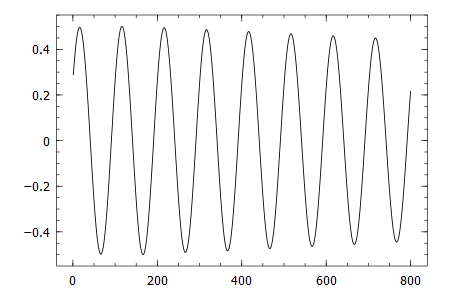

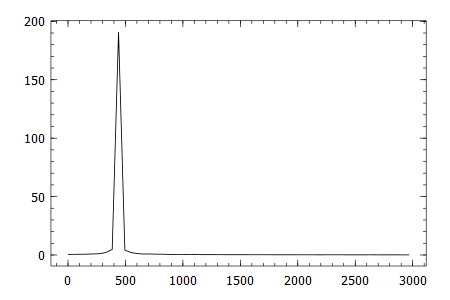

norm(xcomp[1] - xsimple) / norm(xcomp[1]) = 0.23354819344938402


(nothing,nothing)

In [89]:
p=Array(Any,3)
xsimple=[(λ[1]*U[1,1])*U[:,1]; (λ[1]*U[n,1])*U[2:n,1]]
xsimple+=[(λ[2]*U[1,2])*U[:,2]; (λ[2]*U[n,2])*U[2:n,2]]
p[1]=plot(xsimple[1:800])
p[2]=plot(xx,abs(fft(xsimple[1:800]))[1:nn])
@show norm(xcomp[1]-xsimple)/norm(xcomp[1])
display(p[1]), display(p[2])

In [66]:
# Listen
wavplay(xsimple,Fs)